In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
renames_policy = {"main": "fullprogram", "fineq": "fin_inflow"}
df_base = pd.read_csv("perfs_base.csv").rename(renames_policy, axis=1).sort_values(["nx", "ny", "iter"]).reset_index(drop=True)
df_cupy = pd.read_csv("perfs_cupy.csv").rename(renames_policy, axis=1).sort_values(["nx", "ny", "iter"]).reset_index(drop=True)
df_numba = pd.read_csv("perfs_numba.csv").rename(renames_policy, axis=1).sort_values(["nx", "ny", "iter"]).reset_index(drop=True)

assert len(df_base) == len(df_cupy)
assert len(df_base) == len(df_numba)

In [47]:
df_numba.head()

,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,bdwdth_fin_inflow,bdwdth_bounceback,gflops_equilibrium,gflops_collision,gflops_streaming,gflops_macroscopic,gflops_rightwall,gflops_leftwall,gflops_fin_inflow,gflops_bounceback
0,numba,2000.0,420.0,200.0,4.028,0.23320,0.3076,0.28380,0.28420,0.202000,...,0.078,41.103,76.395,16.384,65.706,39.025,0.012,0.014,0.011,7.421
1,numba,1000.0,420.0,300.0,2.402,0.11990,0.2147,0.18620,0.18240,0.124200,...,0.093,52.139,111.426,17.608,75.125,45.595,0.014,0.017,0.014,9.414
2,numba,1500.0,420.0,300.0,3.246,0.18285,0.2703,0.24135,0.23895,0.163350,...,0.107,57.546,109.580,20.976,86.911,52.215,0.017,0.019,0.016,10.390
3,numba,2000.0,420.0,300.0,4.057,0.24260,0.3238,0.29420,0.29160,0.200400,...,0.118,61.455,110.072,23.342,95.047,57.037,0.018,0.021,0.017,11.096
4,numba,2500.0,420.0,300.0,4.859,0.30425,0.3775,0.34700,0.34425,0.236125,...,0.126,64.112,109.736,25.035,100.771,60.394,0.019,0.022,0.018,11.576


In [48]:
columns = ["fullprogram", "equilibrium", "collision", "streaming", "macroscopic",
          "rightwall", "leftwall", "fin_inflow", "bounceback"]
for col in columns:
    new_name = col + "_speedup"
    df_base[new_name] = df_base[col] / df_base[col]
    df_cupy[new_name] = df_base[col] / df_cupy[col]
    df_numba[new_name] = df_base[col] / df_numba[col] 
display(df_base.head(5))
display(df_cupy.head(5))
show=False

,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,remains,fullprogram_speedup,equilibrium_speedup,collision_speedup,streaming_speedup,macroscopic_speedup,rightwall_speedup,leftwall_speedup,fin_inflow_speedup,bounceback_speedup
0,base,2000.0,420.0,200.0,26.19,8.254125,4.4100,2.4260,2.9000,0.023220,...,0.05705,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,base,1000.0,420.0,300.0,19.95,5.991986,3.5320,1.8460,2.3240,0.014590,...,0.03966,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,base,1500.0,420.0,300.0,29.54,8.978982,4.9200,2.7795,3.5025,0.021435,...,0.05435,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,base,2000.0,420.0,300.0,39.43,12.050022,6.6000,3.6940,4.6320,0.028040,...,0.06913,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,base,2500.0,420.0,300.0,49.74,14.940974,8.7975,4.6425,5.8150,0.035000,...,0.08573,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,remains,fullprogram_speedup,equilibrium_speedup,collision_speedup,streaming_speedup,macroscopic_speedup,rightwall_speedup,leftwall_speedup,fin_inflow_speedup,bounceback_speedup
0,cupy,2000.0,420.0,200.0,8.505,2.563281,0.079160,1.40520,0.86300,0.21920,...,-0.05886,3.079365,3.220141,55.709955,1.726445,3.360371,0.105931,0.144274,0.082559,3.759172
1,cupy,1000.0,420.0,300.0,22.220,1.334333,0.039810,0.70990,0.43970,0.11900,...,-0.08032,0.897840,4.490623,88.721427,2.600366,5.285422,0.122605,0.168130,0.095840,0.323296
2,cupy,1500.0,420.0,300.0,32.530,1.999332,0.061455,1.05675,0.65850,0.16695,...,-0.06766,0.908085,4.490991,80.058579,2.630234,5.318907,0.128392,0.177223,0.095734,0.331813
3,cupy,2000.0,420.0,300.0,16.260,2.631315,0.081860,1.45980,0.88920,0.23240,...,-0.07676,2.424969,4.579468,80.625458,2.530484,5.209177,0.120654,0.170797,0.095491,1.260070
4,cupy,2500.0,420.0,300.0,10.870,3.271308,0.102475,1.80350,1.10475,0.28075,...,-0.04972,4.575897,4.567278,85.850207,2.574161,5.263634,0.124666,0.177490,0.093527,5.638889


## Speedup as a function of nx

In [49]:
nx_base = df_base[(df_base["iter"] == 2000) & (df_base["ny"] == 300) & (df_base["nx"] != 420)].sort_values("nx")
nx_cupy = df_cupy[(df_cupy["iter"] == 2000) & (df_cupy["ny"] == 300) & (df_cupy["nx"] != 420)].sort_values("nx")
nx_numba = df_numba[(df_numba["iter"] == 2000) & (df_numba["ny"] == 300) & (df_numba["nx"] != 420)].sort_values("nx")

columns = ["fullprogram", "equilibrium", "collision", "streaming", "macroscopic",
          "rightwall", "leftwall", "fin_inflow", "bounceback"]
for col in columns:
    new_name = col + "_speedup"
    nx_base[new_name] = nx_base[col] / nx_base[col]
    nx_cupy[new_name] = nx_base[col] / nx_cupy[col]
    nx_numba[new_name] = nx_base[col] / nx_numba[col] 
display(nx_base.head(5))
display(nx_cupy.head(5))
show=False

,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,remains,fullprogram_speedup,equilibrium_speedup,collision_speedup,streaming_speedup,macroscopic_speedup,rightwall_speedup,leftwall_speedup,fin_inflow_speedup,bounceback_speedup
30,base,2000.0,500.0,300.0,47.81,14.517255,8.292,4.414,5.906,0.03072,...,0.07573,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
31,base,2000.0,750.0,300.0,73.55,23.851920,12.478,6.340,9.532,0.03230,...,0.08833,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
32,base,2000.0,1000.0,300.0,100.60,34.817400,16.038,8.342,13.406,0.03452,...,0.09191,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
33,base,2000.0,1250.0,300.0,126.40,44.702340,19.522,10.274,17.138,0.03474,...,0.09523,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
34,base,2000.0,1500.0,300.0,154.80,55.227600,22.980,12.366,22.760,0.03354,...,0.10190,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,remains,fullprogram_speedup,equilibrium_speedup,collision_speedup,streaming_speedup,macroscopic_speedup,rightwall_speedup,leftwall_speedup,fin_inflow_speedup,bounceback_speedup
30,cupy,2000.0,500.0,300.0,8.608,2.565282,0.07994,1.4234,0.8672,0.2228,...,-0.05704,5.554136,5.659126,103.727796,3.101026,6.810424,0.137882,0.199960,0.097031,6.629834
31,cupy,2000.0,750.0,300.0,8.683,2.619309,0.08108,1.4410,0.8776,0.2260,...,-0.05950,8.470575,9.106188,153.897385,4.399722,10.861440,0.142920,0.243329,0.104580,9.776744
32,cupy,2000.0,1000.0,300.0,9.237,2.629314,0.08110,1.5772,0.8828,0.2218,...,-0.06040,10.890982,13.242009,197.755857,5.289120,15.185773,0.155636,0.261908,0.110321,10.845732
33,cupy,2000.0,1250.0,300.0,9.167,2.603301,0.08134,1.5342,0.8862,0.2224,...,-0.05842,13.788590,17.171407,240.004918,6.696650,19.338750,0.156205,0.263307,0.115830,13.484730
34,cupy,2000.0,1500.0,300.0,9.124,2.585292,0.08012,1.5168,0.8628,0.2204,...,-0.05997,16.966243,21.362229,286.819770,8.152690,26.379230,0.152178,0.284625,0.120400,15.962733


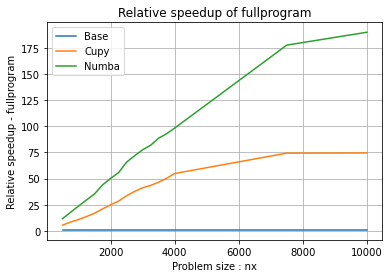

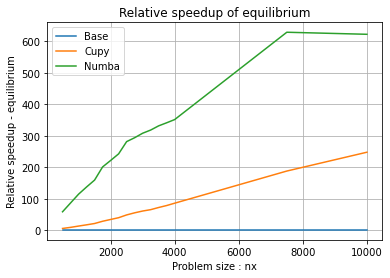

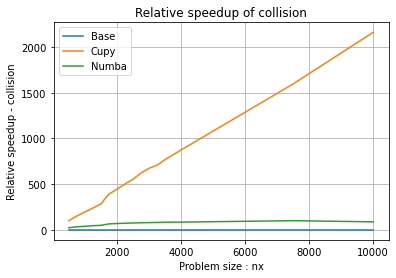

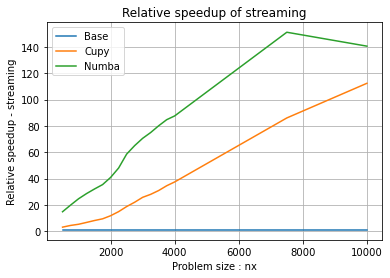

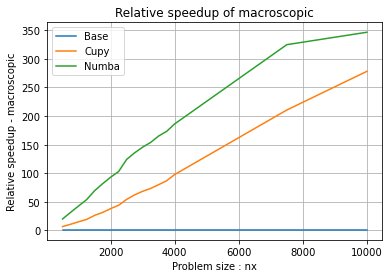

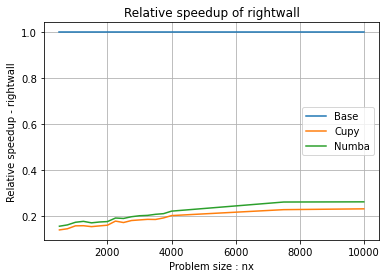

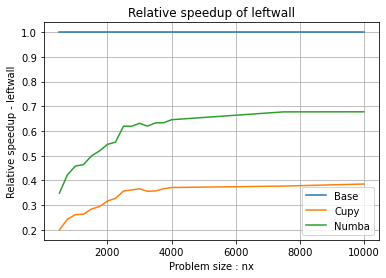

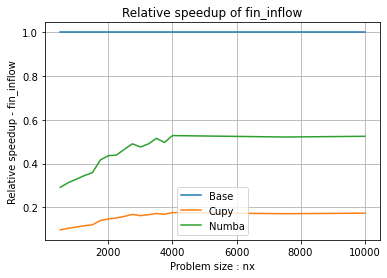

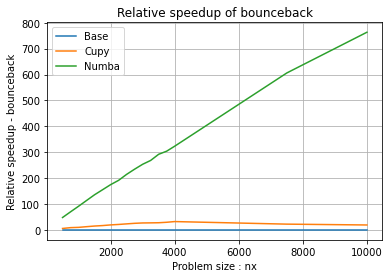

In [54]:
for col in columns:
    fig = plt.figure()
    plt.plot(nx_base["nx"], nx_base[col+"_speedup"], label="Base")
    plt.plot(nx_cupy["nx"], nx_cupy[col+"_speedup"], label="Cupy")
    plt.plot(nx_numba["nx"], nx_numba[col+"_speedup"], label="Numba")
    plt.legend()
    plt.xlabel("Problem size : nx")
    plt.ylabel(f"Relative speedup - {col}")
    plt.title(f"Relative speedup of {col}")
    plt.grid()
    if show:
        plt.show()
    else:
        plt.savefig(f"figures/nx_comparison_{col}.png")

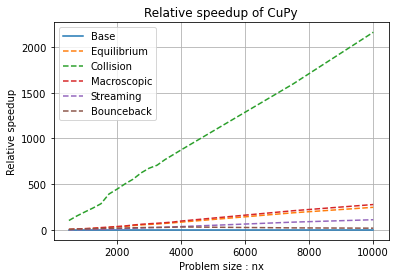

In [55]:
plt.plot(nx_base["nx"], nx_base["fullprogram_speedup"], label="Base")
plt.plot(nx_cupy["nx"], nx_cupy["equilibrium_speedup"], label="Equilibrium", linestyle="dashed")
plt.plot(nx_cupy["nx"], nx_cupy["collision_speedup"], label="Collision", linestyle="dashed")
plt.plot(nx_cupy["nx"], nx_cupy["macroscopic_speedup"], label="Macroscopic", linestyle="dashed")
plt.plot(nx_cupy["nx"], nx_cupy["streaming_speedup"], label="Streaming", linestyle="dashed")
plt.plot(nx_cupy["nx"], nx_cupy["bounceback_speedup"], label="Bounceback", linestyle="dashed")
plt.legend()
plt.xlabel("Problem size : nx")
plt.ylabel("Relative speedup")
plt.title("Relative speedup of CuPy")
plt.grid()
plt.show()

## Speedup as a function of ny

In [56]:
ny_base = df_base[(df_base["iter"] == 2000) & (df_base["nx"] == 420) & (df_base["ny"] != 300)].sort_values("ny")
ny_cupy = df_cupy[(df_cupy["iter"] == 2000) & (df_cupy["nx"] == 420) & (df_cupy["ny"] != 300)].sort_values("ny")
ny_numba = df_numba[(df_numba["iter"] == 2000) & (df_numba["nx"] == 420) & (df_numba["ny"] != 300)].sort_values("ny")

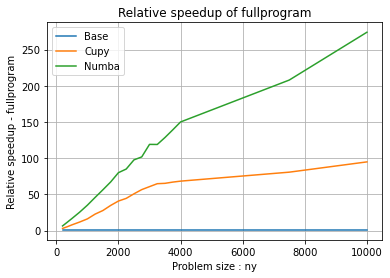

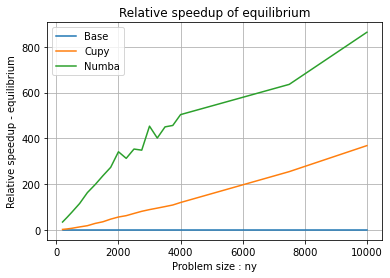

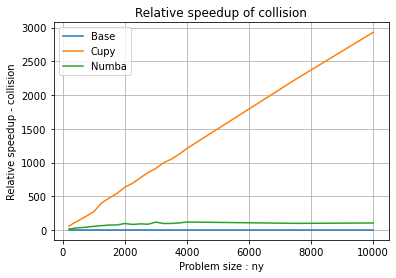

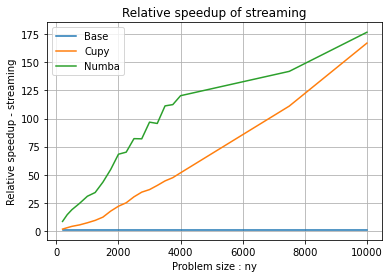

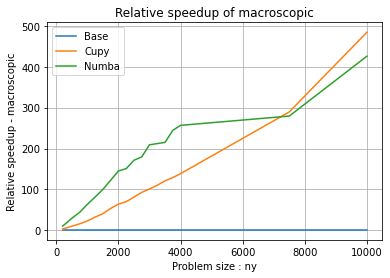

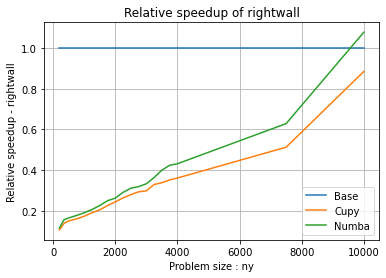

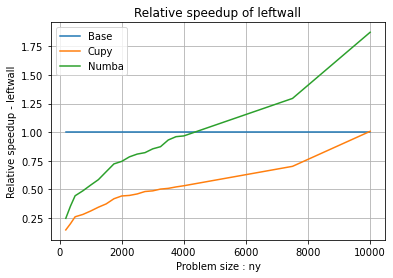

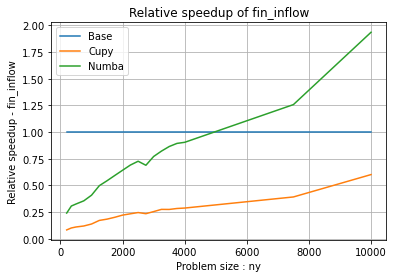

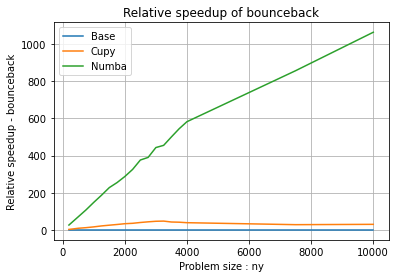

In [57]:
for col in columns:
    fig = plt.figure()
    plt.plot(ny_base["ny"], ny_base[col+"_speedup"], label="Base")
    plt.plot(ny_cupy["ny"], ny_cupy[col+"_speedup"], label="Cupy")
    plt.plot(ny_numba["ny"], ny_numba[col+"_speedup"], label="Numba")
    plt.legend()
    plt.xlabel("Problem size : ny")
    plt.ylabel(f"Relative speedup - {col}")
    plt.title(f"Relative speedup of {col}")
    plt.grid()
    if show:
        plt.show()
    else:
        plt.savefig(f"figures/ny_comparison_{col}.png")

In [58]:
ny_base

,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,remains,fullprogram_speedup,equilibrium_speedup,collision_speedup,streaming_speedup,macroscopic_speedup,rightwall_speedup,leftwall_speedup,fin_inflow_speedup,bounceback_speedup
0,base,2000.0,420.0,200.0,26.19,8.254125,4.410,2.426,2.900,0.02322,...,0.05705,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12,base,2000.0,420.0,350.0,46.40,13.886940,8.002,4.302,5.666,0.03082,...,0.07560,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
13,base,2000.0,420.0,500.0,67.94,20.890440,11.048,5.860,8.790,0.03308,...,0.08632,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
14,base,2000.0,420.0,750.0,108.50,36.558270,16.438,8.508,13.842,0.03566,...,0.09112,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
15,base,2000.0,420.0,1000.0,151.10,51.005490,21.900,11.332,20.420,0.03860,...,0.09960,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,base,2000.0,420.0,1250.0,209.10,75.517740,31.780,14.318,28.380,0.04172,...,0.11550,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
17,base,2000.0,420.0,1500.0,259.20,94.807380,37.800,19.058,35.460,0.04530,...,0.12340,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
18,base,2000.0,420.0,1750.0,326.30,124.582260,43.940,27.080,46.760,0.05020,...,0.12990,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19,base,2000.0,420.0,2000.0,380.40,145.472700,50.320,33.360,54.620,0.05360,...,0.14170,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20,base,2000.0,420.0,2250.0,435.20,164.922420,56.160,39.600,61.600,0.05868,...,0.14380,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Speedup as a function of iter

In [59]:
iter_base = df_base[(df_base["iter"] != 2000) & (df_base["nx"] == 420) & (df_base["ny"] == 300)].sort_values("iter")
iter_cupy = df_cupy[(df_cupy["iter"] != 2000) & (df_cupy["nx"] == 420) & (df_cupy["ny"] == 300)].sort_values("iter")
iter_numba = df_numba[(df_numba["iter"] != 2000) & (df_numba["nx"] == 420) & (df_numba["ny"] == 300)].sort_values("iter")

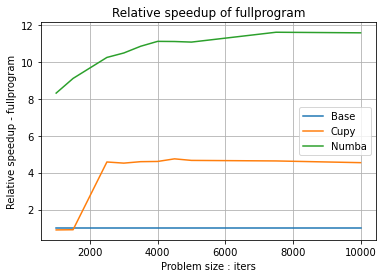

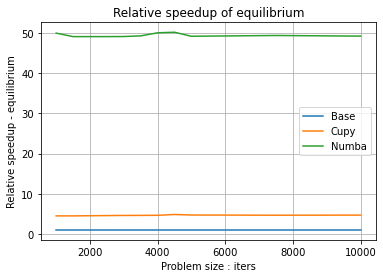

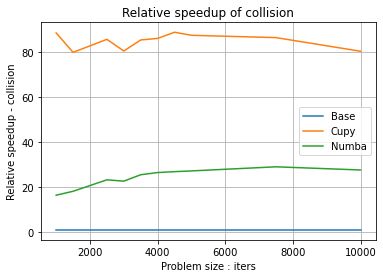

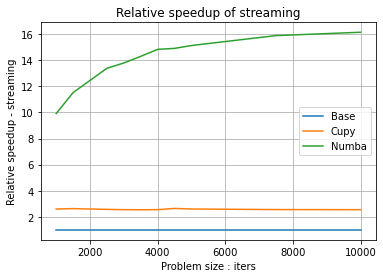

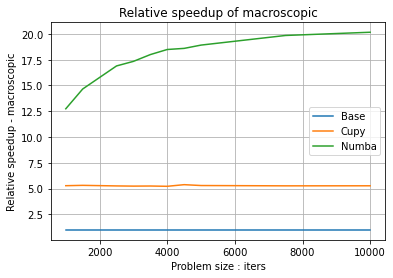

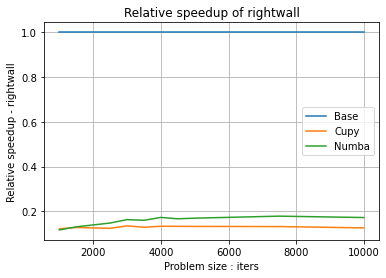

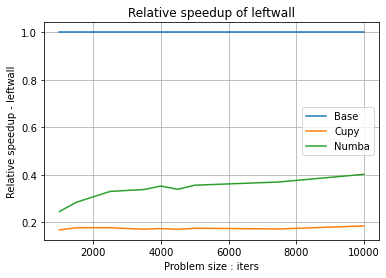

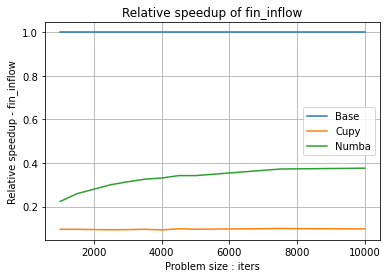

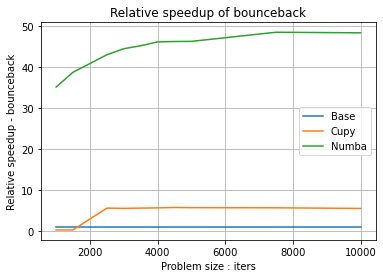

In [60]:
for col in columns:
    fig = plt.figure()
    plt.plot(iter_base["iter"], iter_base[col+"_speedup"], label="Base")
    plt.plot(iter_cupy["iter"], iter_cupy[col+"_speedup"], label="Cupy")
    plt.plot(iter_numba["iter"], iter_numba[col+"_speedup"], label="Numba")
    plt.legend()
    plt.xlabel("Problem size : iters")
    plt.ylabel(f"Relative speedup - {col}")
    plt.title(f"Relative speedup of {col}")
    plt.grid()
    if show:
        plt.show()
    else:
        plt.savefig(f"figures/iter_comparison_{col}.png")

## Bandwidths and Gflops

In [10]:
from parselogs import parse_file
series = parse_file("logs/", "numba", "numba_run_nx5000_ny5000_i5000.log")

Parsing numba_run_nx5000_ny5000_i5000.log


In [14]:
bd = series.index[series.index.str.startswith("bdwdth")].drop("bdwdth_bounceback")
gf = series.index[series.index.str.startswith("gflops")].drop("gflops_bounceback")

In [34]:
series.drop("algo")

iter                      5000
nx                        5000
ny                        5000
main                     65.63
equilibrium              12.95
collision               21.685
streaming                14.69
macroscopic              7.765
rightwall              0.38675
leftwall                 0.571
fin_inflow             0.46445
bounceback              2.1885
remains                  3.747
bdwdth_equilibrium     772.268
bdwdth_collision       830.018
bdwdth_streaming        612.66
bdwdth_macroscopic     708.134
bdwdth_rightwall         3.103
bdwdth_leftwall          1.927
bdwdth_fin_inflow        2.584
bdwdth_bounceback     4112.145
gflops_equilibrium    1023.255
gflops_collision       172.921
gflops_streaming       944.518
gflops_macroscopic    1062.202
gflops_rightwall         0.388
gflops_leftwall          0.438
gflops_fin_inflow        0.377
gflops_bounceback      742.471
dtype: object

Text(0, 0.5, 'bandwidth in GB/s')

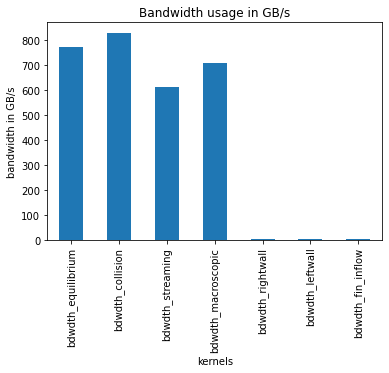

In [18]:
series.loc[bd].plot.bar()
plt.title("Bandwidth usage in GB/s")
plt.xlabel("kernels")
plt.ylabel("bandwidth in GB/s")

Text(0, 0.5, 'bandwidth in GFlops/s')

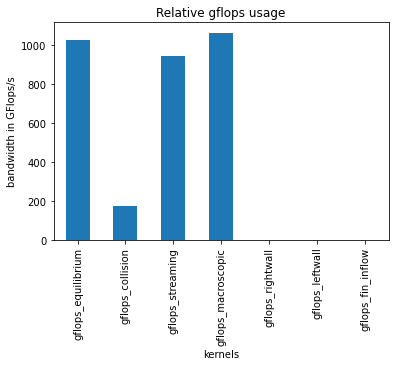

In [19]:
series.loc[gf].plot.bar()

plt.title("Relative gflops usage")
plt.xlabel("kernels")
plt.ylabel("bandwidth in GFlops/s")

In [3]:
df_bdgf = pd.read_csv("perfs_numba.csv").rename(renames_policy, axis=1)
df_bdgf.head(5)

,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,bdwdth_fin_inflow,bdwdth_bounceback,gflops_equilibrium,gflops_collision,gflops_streaming,gflops_macroscopic,gflops_rightwall,gflops_leftwall,gflops_fin_inflow,gflops_bounceback
0,numba,2000.0,500.0,300.0,4.050,0.2460,0.3316,0.2974,0.2924,0.20280,...,0.117,73.272,129.295,27.142,111.963,67.693,0.018,0.021,0.017,13.230
1,numba,2000.0,750.0,300.0,4.149,0.2720,0.3528,0.3180,0.2998,0.20280,...,0.117,108.967,175.399,38.272,157.096,99.093,0.018,0.020,0.017,19.675
2,numba,2000.0,1000.0,300.0,4.210,0.2954,0.3820,0.3770,0.3056,0.19784,...,0.120,146.116,215.230,47.109,176.693,129.560,0.018,0.021,0.017,26.382
3,numba,2000.0,1250.0,300.0,4.344,0.3236,0.4130,0.4056,0.3178,0.20020,...,0.118,179.181,245.616,54.474,205.299,155.746,0.018,0.021,0.017,32.352
4,numba,2000.0,1500.0,300.0,4.416,0.3444,0.4438,0.4292,0.3266,0.19910,...,0.119,215.243,277.046,60.834,232.705,181.837,0.018,0.021,0.017,38.863


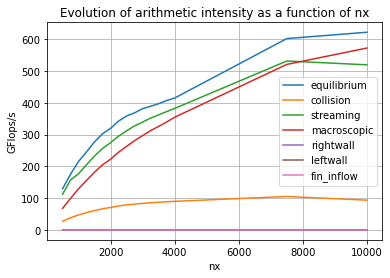

In [24]:
d = df_bdgf[(df_bdgf["iter"] == 2000) & (df_bdgf["ny"] == 300) & (df_bdgf["nx"] != 420)].sort_values("nx")
cols_bd = d.columns[d.columns.str.startswith("gflops")]
fig = plt.figure()
for col in cols_bd:
    if "bounceback" not in col:
        plt.plot(d["nx"], d[col], label = str(col[7:]))
plt.legend()
plt.xlabel("nx")
plt.ylabel("GFlops/s")
plt.title("Evolution of arithmetic intensity as a function of nx")
plt.grid()
plt.show()

In [5]:
d = df_bdgf[(df_bdgf["iter"] == 2000) & (df_bdgf["ny"] == 300) & (df_bdgf["nx"] != 420)].sort_values("nx")
fig = plt.figure()
for col in columns:
    plt.plot(d["nx"], d[col], label = str(col))
plt.legend()
plt.grid()
plt.show()

NameError: name 'columns' is not defined

<Figure size 432x288 with 0 Axes>

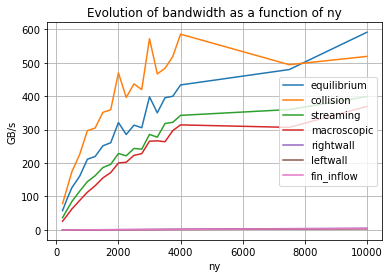

In [36]:
d = df_bdgf[(df_bdgf["iter"] == 2000) & (df_bdgf["ny"] != 300) & (df_bdgf["nx"] == 420)].sort_values("ny")
cols_bd = d.columns[d.columns.str.startswith("bdwdth")]
fig = plt.figure()
for col in cols_bd:
    if "bounceback" not in col:
        plt.plot(d["ny"], d[col], label = str(col[7:]))
plt.legend()
plt.xlabel("ny")
plt.ylabel("GB/s")
plt.title("Evolution of bandwidth as a function of ny")
plt.grid()
plt.show()